In [1]:
import csv
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
# Generate simulated dataset
def generate_data(num_samples=1000):
    data = []
    for _ in range(num_samples):
        connection_duration = random.uniform(1, 60)  # in minutes
        signal_strength = random.uniform(-100, -30)  # in dBm
        data_transfer_rate = random.uniform(1, 100)  # in Mbps
        time_of_day = random.uniform(0, 24)  # in hours

        # Simulate intrusions
        is_intrusion = random.random() < 0.1  # 10% chance of being an intrusion

        data.append([connection_duration, signal_strength, data_transfer_rate, time_of_day, is_intrusion])

    with open('bluetooth_data1.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['connection_duration', 'signal_strength', 'data_transfer_rate', 'time_of_day', 'is_intrusion'])
        writer.writerows(data)

In [3]:
# Train logistic regression model
def train_model():
    data = np.genfromtxt('bluetooth_data.csv', delimiter=',', skip_header=1)
    X = data[:, :-1]
    y = data[:, -1]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    return model, scaler

In [4]:
# Classify a connection
def classify_connection(model, scaler, sample):
    sample_scaled = scaler.transform([[
        sample['connection_duration'],
        sample['signal_strength'],
        sample['data_transfer_rate'],
        sample['time_of_day']
    ]])
    return model.predict(sample_scaled)[0]

              precision    recall  f1-score   support

         0.0       0.88      0.50      0.64       269
         1.0       0.09      0.42      0.15        31

    accuracy                           0.49       300
   macro avg       0.49      0.46      0.39       300
weighted avg       0.80      0.49      0.59       300


Options:
1. Display Bluetooth connections
2. Simulate real-time detection
3. Exit
Enter your choice: 1


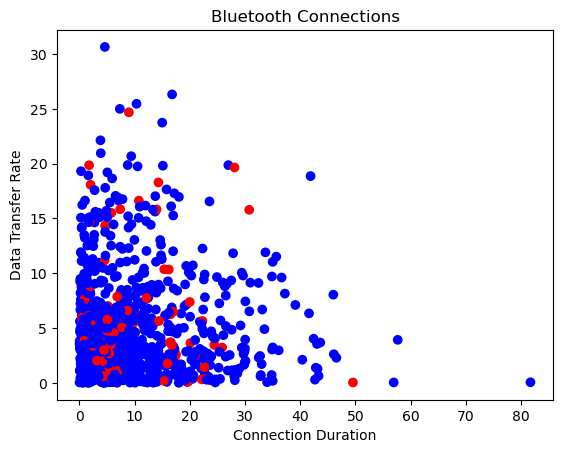


Options:
1. Display Bluetooth connections
2. Simulate real-time detection
3. Exit
Enter your choice: 2
Data: {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10} => Status: Intrusion Detected!
Blocking intrusion: {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10}
Data: {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 22} => Status: Normal Connection
Data: {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 2, 'time_of_day': 15} => Status: Intrusion Detected!
Blocking intrusion: {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 2, 'time_of_day': 15}
Data: {'connection_duration': 30, 'signal_strength': -30, 'data_transfer_rate': 15, 'time_of_day': 3} => Status: Normal Connection
Data: {'connection_duration': 1, 'signal_strength': -90, 'data_transfer_rate': 50, 'time_of_day': 3} => Status: Intrusion Detected!
Blockin

In [5]:
# Block an intrusion (simulated)
def block_intrusion(sample):
    print(f"Blocking intrusion: {sample}")

# Command-line interface
def main():
    generate_data()
    model, scaler = train_model()

    while True:
        print("\nOptions:")
        print("1. Display Bluetooth connections")
        print("2. Simulate real-time detection")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            data = np.genfromtxt('bluetooth_data.csv', delimiter=',', skip_header=1)
            plt.scatter(data[:, 0], data[:, 2], c=data[:, -1], cmap='bwr')
            plt.xlabel('Connection Duration')
            plt.ylabel('Data Transfer Rate')
            plt.title('Bluetooth Connections')
            plt.show()
        elif choice == '2':
            test_samples = [
                {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10},
                {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 22},
                {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 2, 'time_of_day': 15},
                {'connection_duration': 30, 'signal_strength': -30, 'data_transfer_rate': 15, 'time_of_day': 3},
                {'connection_duration': 1, 'signal_strength': -90, 'data_transfer_rate': 50, 'time_of_day': 3}
            ]

            for sample in test_samples:
                prediction = classify_connection(model, scaler, sample)
                status = "Intrusion Detected!" if prediction == 1 else "Normal Connection"
                print(f"Data: {sample} => Status: {status}")
                if prediction == 1:
                    block_intrusion(sample)
        elif choice == '3':
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
